## Mobility of a sedimenting lattice as a function of volume fraction


In [4]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt 
import numpy as np
import pystokes, os, sys
import pyforces

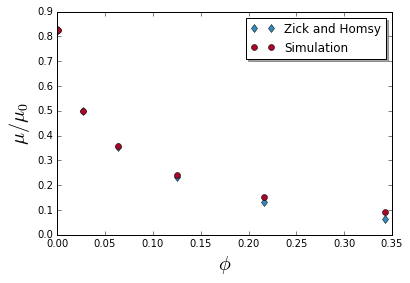

In [5]:
#Parameters
a, eta, dim = 1.0, 1.0/6, 3
Np, Nb, Nm = 1, 1, 6
ta =(4*np.pi/3)**(1.0/3) 
L = ta/np.asarray([0.1, 0.3, 0.4, 0.5, 0.6, 0.7])

#Memory allocation
v = np.zeros(dim*Np)         
r = np.zeros(dim*Np)        
F = np.zeros(dim*Np)  
vv  = np.zeros(np.size(L))
phi = np.zeros(np.size(L) )

mu=1.0/(6*np.pi*eta*a)

for i in range(np.size(L)):
    v = v*0
    F = F*0

    r[0], r[1], r[2] = 0.0, 0.0, 0.0

    ff = pyforces.forceFields.Forces(Np)
    ff.sedimentation(F, g=-1)                          
    
    pRbm = pystokes.periodic.Rbm(a, Np, eta, L[i])   
    pRbm.stokesletV(v, r, F, Nb, Nm)                  
    
    phi[i] = (4*np.pi*a**3)/(3*L[i]**3)
    mu00 = mu*F[2]
    vv[i] = v[2]/mu00     


exR = [.825, .498, .356, .233, .134, .065]
plt.plot(phi, exR, 'd', color="#348ABD", label='Zick and Homsy')
plt.plot(phi, vv, 'o', color="#A60628", label='Simulation')
plt.xlabel(r'$\phi$', fontsize=20)
#plt.xlim(0.01, np.max(phi**(1.0/3)))
plt.ylabel(r'$\mu/\mu_0$', fontsize=20)
plt.legend(loc='upper right', shadow=True)
plt.show()

In [6]:
print 'volume fraction   simulation\t Zick & Homsy (1982)'
for i in range(np.size(L)):
    print ('%1.3f\t\t  %1.3f\t\t %1.3f\t'%(phi[i], vv[i], exR[i] ))

volume fraction   simulation	 Zick & Homsy (1982)
0.001		  0.825		 0.825	
0.027		  0.499		 0.498	
0.064		  0.360		 0.356	
0.125		  0.243		 0.233	
0.216		  0.152		 0.134	
0.343		  0.090		 0.065	
